In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

603


In [5]:
base_url = "http://api.openweathermap.org/data/2.5/weather"
city_weather = {}
params = {
    "appid": weather_key,
    "units": "imperial",
    "q":""
}
for i, city in enumerate(cities):
    #update params
    params["q"] = city.city_name + "," + city.country_code
    #make api call
    response = requests.get(base_url, params)
    #if we get a bad response from the server move on to next iteration
    if not response:
        print(f"{i}) Could NOT FIND data for {city.city_name.title()}, {city.country_code.upper()}")
        continue
    #Try to fill our dict
    data = response.json()
    city_weather[city.city_name] = {}
    try:
        city_weather[city.city_name]["country"] = data["sys"]["country"]
        city_weather[city.city_name]["Lat"] =  data["coord"]["lat"]
        city_weather[city.city_name]["Lng"] =  data["coord"]["lon"]
        city_weather[city.city_name]["temp (f)"] = data["main"]["temp_max"]
        city_weather[city.city_name]["humidity %"] =  data["main"]["humidity"]
        city_weather[city.city_name]["cloudiness %"] =  data["clouds"]["all"]
        city_weather[city.city_name]["wind (mph)"] =  data["wind"]["speed"]
    except:
        # if some data is missing we'll None out the values for this entry
        city_weather[city.city_name]["temp (f)"] = None
        city_weather[city.city_name]["humidity %"] =  None
        city_weather[city.city_name]["cloudiness %"] =  None
        city_weather[city.city_name]["wind (mph)"] =  None
        #print that there was an error
        print(f"{i}) MISSING data for {city.city_name.title()}, {city.country_code.upper()}")
        continue
    #if we've made it to the end of the loop all required data has been retrieved succefully.
    print(f"{i}) Data SUCCESSFULLY added for {city.city_name.title()}, {city.country_code.upper()}")
    

0) Data SUCCESSFULLY added for Willowmore, ZA
1) Data SUCCESSFULLY added for Marawi, SD
2) Data SUCCESSFULLY added for Attert, BE
3) Could NOT FIND data for Masjed-E Soleyman, IR
4) Data SUCCESSFULLY added for Berlevag, NO
5) Could NOT FIND data for Asau, TV
6) Data SUCCESSFULLY added for Busselton, AU
7) Data SUCCESSFULLY added for Cape Town, ZA
8) Data SUCCESSFULLY added for Castro, CL
9) Data SUCCESSFULLY added for Sioux Lookout, CA
10) Data SUCCESSFULLY added for Kodiak, US
11) Data SUCCESSFULLY added for Hobart, AU
12) Data SUCCESSFULLY added for Bonavista, CA
13) Data SUCCESSFULLY added for Zyryanovsk, KZ
14) Data SUCCESSFULLY added for Torbay, CA
15) Data SUCCESSFULLY added for Vaini, TO
16) Data SUCCESSFULLY added for Bredasdorp, ZA
17) Data SUCCESSFULLY added for San Andres, CO
18) Data SUCCESSFULLY added for Sao Filipe, CV
19) Data SUCCESSFULLY added for Narsaq, GL
20) Data SUCCESSFULLY added for Sterling, US
21) Data SUCCESSFULLY added for Preobrazheniye, RU
22) Data SUCCESS

180) Data SUCCESSFULLY added for Kaitangata, NZ
181) Data SUCCESSFULLY added for Rock Sound, BS
182) Data SUCCESSFULLY added for Mount Gambier, AU
183) Data SUCCESSFULLY added for Axim, GH
184) Could NOT FIND data for Grand River South East, MU
185) Data SUCCESSFULLY added for Kamaishi, JP
186) Data SUCCESSFULLY added for Kiama, AU
187) Could NOT FIND data for Karaul, RU
188) Data SUCCESSFULLY added for Athens, US
189) Data SUCCESSFULLY added for Monteagudo, BO
190) Data SUCCESSFULLY added for Sari, IR
191) Data SUCCESSFULLY added for Poum, NC
192) Data SUCCESSFULLY added for Cururupu, BR
193) Data SUCCESSFULLY added for Lodja, CD
194) Data SUCCESSFULLY added for Shitkino, RU
195) Could NOT FIND data for Satitoa, WS
196) Data SUCCESSFULLY added for Beringovskiy, RU
197) Data SUCCESSFULLY added for Zempoala, MX
198) Data SUCCESSFULLY added for Saint-Augustin, CA
199) Data SUCCESSFULLY added for Fagersta, SE
200) Data SUCCESSFULLY added for Changji, CN
201) Data SUCCESSFULLY added for La

359) Could NOT FIND data for Rungata, KI
360) Data SUCCESSFULLY added for Livingstone, ZM
361) Data SUCCESSFULLY added for Antigonish, CA
362) Data SUCCESSFULLY added for Ekhabi, RU
363) Data SUCCESSFULLY added for Owando, CG
364) Could NOT FIND data for Tidore, ID
365) Data SUCCESSFULLY added for Cervo, ES
366) Data SUCCESSFULLY added for Luderitz, NA
367) Could NOT FIND data for Bereda, SO
368) Data SUCCESSFULLY added for Dingle, IE
369) Data SUCCESSFULLY added for Bathsheba, BB
370) Data SUCCESSFULLY added for Amurrio, ES
371) Data SUCCESSFULLY added for Jati, PK
372) Data SUCCESSFULLY added for Xihe, CN
373) Data SUCCESSFULLY added for Udachnyy, RU
374) Data SUCCESSFULLY added for Tabou, CI
375) Could NOT FIND data for Sorvag, FO
376) Data SUCCESSFULLY added for Palmas, BR
377) Could NOT FIND data for Airai, PW
378) Data SUCCESSFULLY added for Livingstonia, MW
379) Data SUCCESSFULLY added for Inyonga, TZ
380) Data SUCCESSFULLY added for Jinchang, CN
381) Data SUCCESSFULLY added for

539) Data SUCCESSFULLY added for Tacuarembo, UY
540) Data SUCCESSFULLY added for Kahului, US
541) Data SUCCESSFULLY added for Sistranda, NO
542) Data SUCCESSFULLY added for Camacha, PT
543) Data SUCCESSFULLY added for Amuntai, ID
544) Data SUCCESSFULLY added for Kloulklubed, PW
545) Data SUCCESSFULLY added for Mao, TD
546) Data SUCCESSFULLY added for Nizhniy Tsasuchey, RU
547) Data SUCCESSFULLY added for Tilichiki, RU
548) Data SUCCESSFULLY added for Marau, BR
549) Data SUCCESSFULLY added for Takoradi, GH
550) Data SUCCESSFULLY added for Daru, PG
551) Data SUCCESSFULLY added for Hun, LY
552) Data SUCCESSFULLY added for Grand Gaube, MU
553) Could NOT FIND data for Manzil Tamim, TN
554) Data SUCCESSFULLY added for Port Shepstone, ZA
555) Data SUCCESSFULLY added for Tessalit, ML
556) Data SUCCESSFULLY added for Arlit, NE
557) Data SUCCESSFULLY added for Itanagar, IN
558) Data SUCCESSFULLY added for Kushmurun, KZ
559) Data SUCCESSFULLY added for Ola, RU
560) Data SUCCESSFULLY added for Jal

In [6]:
df = pd.DataFrame(city_weather).transpose()

In [19]:
df.head()

,country,Lat,Lng,temp (f),humidity %,cloudiness %,wind (mph)
willowmore,ZA,-33.29,23.49,65.95,55,0,9.75
marawi,SD,18.48,31.82,68.14,26,0,13.33
attert,BE,49.75,5.79,37.99,96,0,3.51
berlevag,NO,70.86,29.09,35.6,82,0,23.04
busselton,AU,-33.65,115.33,54,97,23,4.94


In [9]:
df.to_csv(output_data_file)

In [17]:
print(df["cloudiness %"].max())
print(df["humidity %"].max())

100
100


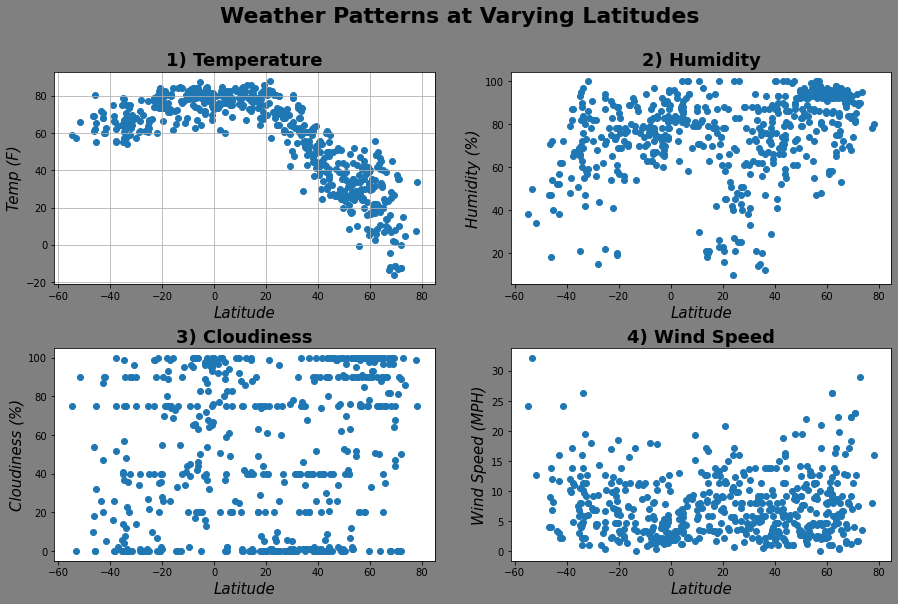

In [42]:
#make a 2x2 figure
fig, ax = plt.subplots(2,2, figsize = (15,9))
#temp scatter
ax[0][0].scatter(df["Lat"],df["temp (f)"])
ax[0][0].grid()
ax[0][0].set_title("1) Temperature", fontsize = 18, weight="bold")
ax[0][0].set_xlabel("Latitude", fontsize = 15, style="italic")
ax[0][0].set_ylabel("Temp (F)", fontsize = 15, style="italic")
#humidity scatter
ax[0][1].scatter(df["Lat"],df["humidity %"])
ax[0][1].grid()
ax[0][1].set_title("2) Humidity", fontsize = 18, weight="bold")
ax[0][1].set_xlabel("Latitude", fontsize = 15, style="italic")
ax[0][1].set_ylabel("Humidity (%)", fontsize = 15, style="italic")
#cloudiness scatter
ax[1][0].scatter(df["Lat"],df["cloudiness %"])
ax[1][0].grid()
ax[1][0].set_title("3) Cloudiness", fontsize = 18, weight="bold")
ax[1][0].set_xlabel("Latitude", fontsize = 15, style="italic")
ax[1][0].set_ylabel("Cloudiness (%)", fontsize = 15, style="italic")
#wind speed scatter
ax[1][1].scatter(df["Lat"],df["wind (mph)"])
ax[1][1].grid()
ax[1][1].set_title("4) Wind Speed", fontsize = 18, weight="bold")
ax[1][1].set_xlabel("Latitude", fontsize = 15, style="italic")
ax[1][1].set_ylabel("Wind Speed (MPH)", fontsize = 15, style="italic")
#figure settings
fig.suptitle("Weather Patterns at Varying Latitudes", fontsize = 22, weight="heavy")
fig.patch.set_facecolor('.5')
fig.subplots_adjust(hspace=0.3)
#save and show
plt.savefig("output_data/weather_pattern_scatters.png")
plt.show()

# Plot analysis
  * Plot 1) Temperature is closely correlated with latitude. It is getting to summer time in the lower. latitudes so the higher values on the left side of the plot are to be expected.
  * Plot 2) There seems to be little correlation between latitude and humidity.
  * Plot 3) There seems to be no correlation between latitude and cloud cover.
  * Plot 4) There seems to be a slight correlation between latitude and wind speed. The most extreme windspeeds are observable at the extremes of lat/lng spectrum

In [44]:
#seperate our dataframe into northern and southern hemispheres
df_north = df.loc[df["Lat"] > 0,:]
df_south = df.loc[df["Lat"] < 0,:]

In [45]:
#check that our two dfs max and min values are within range
print(df_north["Lat"].min())
print(df_south["Lat"].max())

0.54
-0.22


# Regressions

The coefficient of determination (r^2) for the northern hemisphere is 0.7788
The coefficient of determination (r^2) for the southern hemisphere is 0.4221


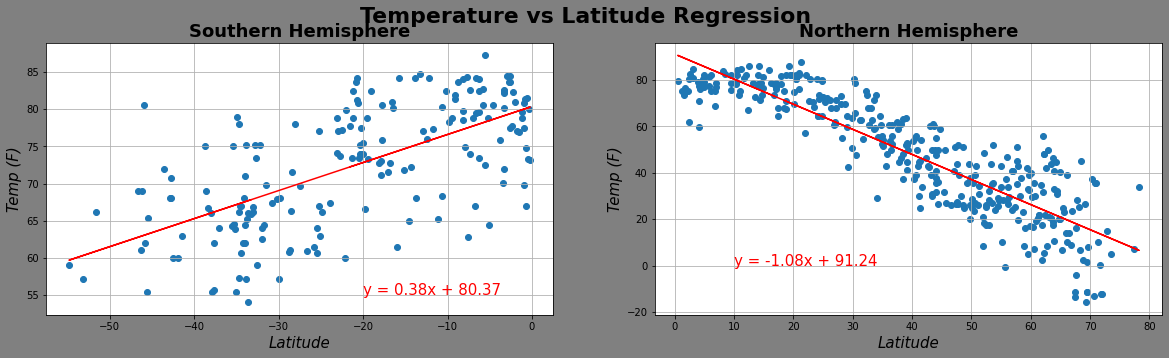

In [82]:
#make the fig and plots for temp
fig, ax = plt.subplots(1,2, figsize = (20,5))

#north plot
ax[1].scatter(df_north["Lat"],df_north["temp (f)"])
ax[1].grid()
ax[1].set_title("Northern Hemisphere", fontsize = 18, weight="bold")
ax[1].set_xlabel("Latitude", fontsize = 15, style="italic")
ax[1].set_ylabel("Temp (F)", fontsize = 15, style="italic")
#get regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(df_north["Lat"].astype(float), df_north["temp (f)"].astype(float))
n_regress_values = df_north["Lat"] * slope + intercept
ax[1].plot(df_north["Lat"], n_regress_values, color = 'r')
line_eq = f"y = {slope.round(2)}x + {intercept.round(2)}"
ax[1].annotate(line_eq, (10,0), fontsize = 15, color = "r")
#print correlation coeff
print(f"The coefficient of determination (r^2) for the northern hemisphere is {(rvalue**2).round(4)}")

#south plot
ax[0].scatter(df_south["Lat"],df_south["temp (f)"])
ax[0].grid()
ax[0].set_title("Southern Hemisphere", fontsize = 18, weight="bold")
ax[0].set_xlabel("Latitude", fontsize = 15, style="italic")
ax[0].set_ylabel("Temp (F)", fontsize = 15, style="italic")
#get regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(df_south["Lat"].astype(float),df_south["temp (f)"].astype(float))
s_regress_values = df_south["Lat"] * slope + intercept
ax[0].plot(df_south["Lat"], s_regress_values, color = 'r')
line_eq = f"y = {slope.round(2)}x + {intercept.round(2)}"
ax[0].annotate(line_eq, (-20,55), fontsize = 15, color = "r")
#print correlation coeff
print(f"The coefficient of determination (r^2) for the southern hemisphere is {(rvalue**2).round(4)}")

#figure settings
fig.suptitle("Temperature vs Latitude Regression", fontsize = 22, weight="heavy")
fig.patch.set_facecolor('.5')
#save and show
plt.savefig("output_data/temp_regression.png")
plt.show()

# Regression analysis
* (North) There is a strong correlation between temp and latitude in the northern hemisphere at this time of year. Temperatures get warmer as you head toward 0 degrees latitude
* (South) There is a moderate correlation between temp and latitude in the southern hemisphere at this time of year. As with the north, temperatures get warmer as you head toward 0 degrees latitude.
* We have nearly twice as many samples in the northern hemisphere (356 vs 185). With more samples the coorelations may become closer to equal.

The coefficient of determination (r^2) for the northern hemisphere is 0.0868
The coefficient of determination (r^2) for the southern hemisphere is 0.1514


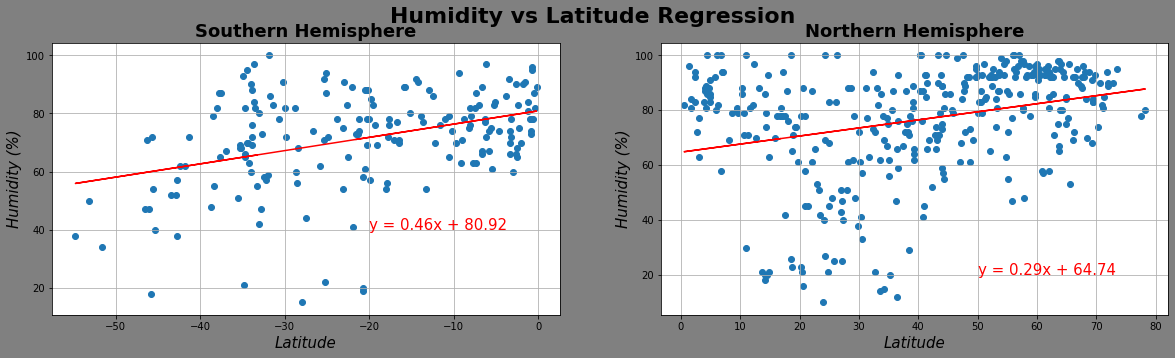

In [83]:
#make the fig and plots for humidity
fig, ax = plt.subplots(1,2, figsize = (20,5))

#north plot
ax[1].scatter(df_north["Lat"],df_north["humidity %"])
ax[1].grid()
ax[1].set_title("Northern Hemisphere", fontsize = 18, weight="bold")
ax[1].set_xlabel("Latitude", fontsize = 15, style="italic")
ax[1].set_ylabel("Humidity (%)", fontsize = 15, style="italic")
#get regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(df_north["Lat"].astype(float), df_north["humidity %"].astype(float))
n_regress_values = df_north["Lat"] * slope + intercept
ax[1].plot(df_north["Lat"], n_regress_values, color = 'r')
line_eq = f"y = {slope.round(2)}x + {intercept.round(2)}"
ax[1].annotate(line_eq, (50,20), fontsize = 15, color = "r")
#print correlation coeff
print(f"The coefficient of determination (r^2) for the northern hemisphere is {(rvalue**2).round(4)}")

#south plot
ax[0].scatter(df_south["Lat"],df_south["humidity %"])
ax[0].grid()
ax[0].set_title("Southern Hemisphere", fontsize = 18, weight="bold")
ax[0].set_xlabel("Latitude", fontsize = 15, style="italic")
ax[0].set_ylabel("Humidity (%)", fontsize = 15, style="italic")
#get regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(df_south["Lat"].astype(float),df_south["humidity %"].astype(float))
s_regress_values = df_south["Lat"] * slope + intercept
ax[0].plot(df_south["Lat"], s_regress_values, color = 'r')
line_eq = f"y = {slope.round(2)}x + {intercept.round(2)}"
ax[0].annotate(line_eq, (-20,40), fontsize = 15, color = "r")
#print correlation coeff
print(f"The coefficient of determination (r^2) for the southern hemisphere is {(rvalue**2).round(4)}")

#figure settings
fig.suptitle("Humidity vs Latitude Regression", fontsize = 22, weight="heavy")
fig.patch.set_facecolor('.5')
#save and show
plt.savefig("output_data/humidity_regression.png")
plt.show()

# Regression analysis
* Humidity is very weakly coorilated with latitude at this time of year.
* There seems to be an overall trend towards higher humidity at higher latitudes.

The coefficient of determination (r^2) for the northern hemisphere is 0.0721
The coefficient of determination (r^2) for the southern hemisphere is 0.1142


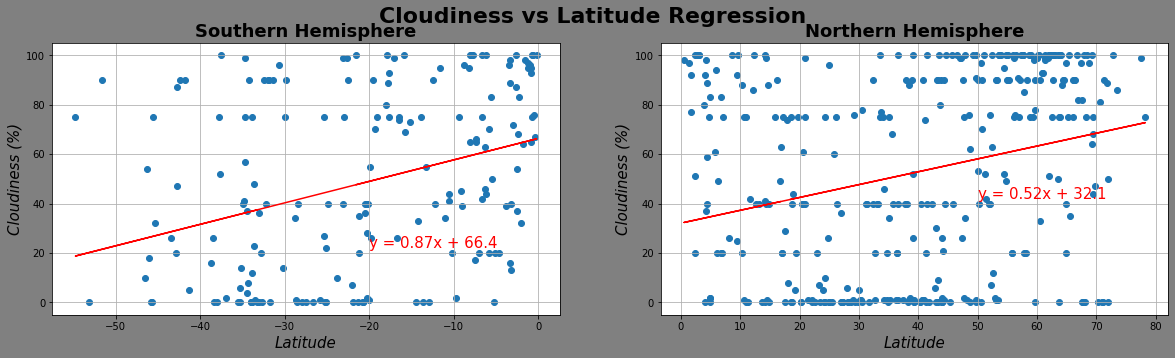

In [84]:
#make the fig and plots for cloudiness
fig, ax = plt.subplots(1,2, figsize = (20,5))

#north plot
ax[1].scatter(df_north["Lat"],df_north["cloudiness %"])
ax[1].grid()
ax[1].set_title("Northern Hemisphere", fontsize = 18, weight="bold")
ax[1].set_xlabel("Latitude", fontsize = 15, style="italic")
ax[1].set_ylabel("Cloudiness (%)", fontsize = 15, style="italic")
#get regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(df_north["Lat"].astype(float), df_north["cloudiness %"].astype(float))
n_regress_values = df_north["Lat"] * slope + intercept
ax[1].plot(df_north["Lat"], n_regress_values, color = 'r')
line_eq = f"y = {slope.round(2)}x + {intercept.round(2)}"
ax[1].annotate(line_eq, (50,42), fontsize = 15, color = "r")
#print correlation coeff
print(f"The coefficient of determination (r^2) for the northern hemisphere is {(rvalue**2).round(4)}")

#south plot
ax[0].scatter(df_south["Lat"],df_south["cloudiness %"])
ax[0].grid()
ax[0].set_title("Southern Hemisphere", fontsize = 18, weight="bold")
ax[0].set_xlabel("Latitude", fontsize = 15, style="italic")
ax[0].set_ylabel("Cloudiness (%)", fontsize = 15, style="italic")
#get regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(df_south["Lat"].astype(float),df_south["cloudiness %"].astype(float))
s_regress_values = df_south["Lat"] * slope + intercept
ax[0].plot(df_south["Lat"], s_regress_values, color = 'r')
line_eq = f"y = {slope.round(2)}x + {intercept.round(2)}"
ax[0].annotate(line_eq, (-20,22), fontsize = 15, color = "r")
#print correlation coeff
print(f"The coefficient of determination (r^2) for the southern hemisphere is {(rvalue**2).round(4)}")

#figure settings
fig.suptitle("Cloudiness vs Latitude Regression", fontsize = 22, weight="heavy")
fig.patch.set_facecolor('.5')
#save and show
plt.savefig("output_data/clouds_regression.png")
plt.show()

# Regression Analysis
* Cloudiness is very weakly coorilated with latitude at this time of year.
* There seems to be an overall trend towards more cloudiness at higher latitudes.

The coefficient of determination (r^2) for the northern hemisphere is 0.0221
The coefficient of determination (r^2) for the southern hemisphere is 0.1416


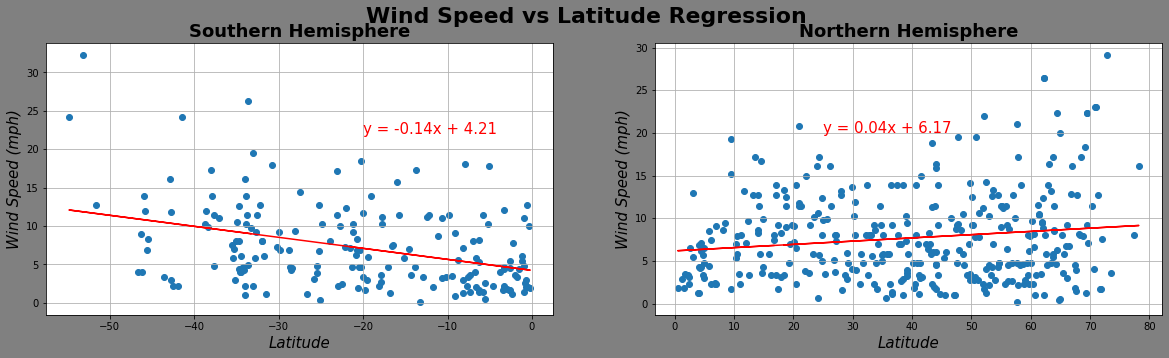

In [87]:
#make the fig and plots for wind speed
fig, ax = plt.subplots(1,2, figsize = (20,5))

#north plot
ax[1].scatter(df_north["Lat"],df_north["wind (mph)"])
ax[1].grid()
ax[1].set_title("Northern Hemisphere", fontsize = 18, weight="bold")
ax[1].set_xlabel("Latitude", fontsize = 15, style="italic")
ax[1].set_ylabel("Wind Speed (mph)", fontsize = 15, style="italic")
#get regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(df_north["Lat"].astype(float), df_north["wind (mph)"].astype(float))
n_regress_values = df_north["Lat"] * slope + intercept
ax[1].plot(df_north["Lat"], n_regress_values, color = 'r')
line_eq = f"y = {slope.round(2)}x + {intercept.round(2)}"
ax[1].annotate(line_eq, (25,20), fontsize = 15, color = "r")
#print correlation coeff
print(f"The coefficient of determination (r^2) for the northern hemisphere is {(rvalue**2).round(4)}")

#south plot
ax[0].scatter(df_south["Lat"],df_south["wind (mph)"])
ax[0].grid()
ax[0].set_title("Southern Hemisphere", fontsize = 18, weight="bold")
ax[0].set_xlabel("Latitude", fontsize = 15, style="italic")
ax[0].set_ylabel("Wind Speed (mph)", fontsize = 15, style="italic")
#get regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(df_south["Lat"].astype(float),df_south["wind (mph)"].astype(float))
s_regress_values = df_south["Lat"] * slope + intercept
ax[0].plot(df_south["Lat"], s_regress_values, color = 'r')
line_eq = f"y = {slope.round(2)}x + {intercept.round(2)}"
ax[0].annotate(line_eq, (-20,22), fontsize = 15, color = "r")
#print correlation coeff
print(f"The coefficient of determination (r^2) for the southern hemisphere is {(rvalue**2).round(4)}")

#figure settings
fig.suptitle("Wind Speed vs Latitude Regression", fontsize = 22, weight="heavy")
fig.patch.set_facecolor('.5')
#save and show
plt.savefig("output_data/winds_regression.png")
plt.show()

# Regression Analysis
* There is little correlation between wind speed and latitude at this time of year.